In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
df=pd.read_csv('Wind_turbine.csv')

In [ ]:
df.shape

(50530, 5)

In [ ]:
df.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [ ]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


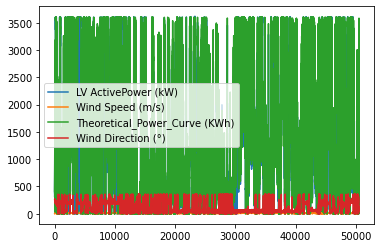

In [ ]:
df.plot()

In [ ]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'],format='%d %m %Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [ ]:
#set data as index
df.set_index("Date/Time",inplace=True)

In [ ]:
#change column names
df.columns = ['Power','Wind_speed','Theoretical_power','Wind_direction']

##Checking for Null Values

In [ ]:
(df[df.columns]==0).sum()

Power                10781
Wind_speed              10
Theoretical_power     7749
Wind_direction          75
dtype: int64

In [ ]:
df.isnull().sum()

Power                0
Wind_speed           0
Theoretical_power    0
Wind_direction       0
dtype: int64

In [ ]:
df.index.min(),df.index.max() 

(Timestamp('2018-01-01 00:00:00'), Timestamp('2018-12-31 23:50:00'))

##To check data is stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
import random
random.seed(7)
# ADF Test
#Augmented Dickey–Fuller test
result = adfuller(df["Power"].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -14.008554764649642
p-value: 3.74966000642018e-26
Critial Values:
   1%, -3.430479515625399
Critial Values:
   5%, -2.861597243258846
Critial Values:
   10%, -2.566800468691333


In [ ]:
data = df[['Wind_speed']].copy()

In [ ]:
data.head()

,Wind_speed
Date/Time,
2018-01-01 00:00:00,5.311336
2018-01-01 00:10:00,5.672167
2018-01-01 00:20:00,5.216037
2018-01-01 00:30:00,5.659674
2018-01-01 00:40:00,5.577941


In [ ]:
#Sort the Date / index column
data.sort_index(inplace=True)
data.head()

,Wind_speed
Date/Time,
2018-01-01 00:00:00,5.311336
2018-01-01 00:10:00,5.672167
2018-01-01 00:20:00,5.216037
2018-01-01 00:30:00,5.659674
2018-01-01 00:40:00,5.577941


##Applying Auto ARIMA

In [ ]:
!pip install pmdarima

In [ ]:
data.shape

(50530, 1)

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data, train_size=int(0.7 * data.shape[0]))

In [ ]:
# Fit your model
model = pm.auto_arima( train, start_p=2,start_q=2, seasonal=False, trace = True,random =True) #seasonal =False
# random search
# make your forecasts
forecasts = model.predict(test.shape[0])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=79964.617, Time=36.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=80469.367, Time=7.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=80350.795, Time=4.82 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=80327.802, Time=5.86 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=80467.367, Time=0.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=79974.807, Time=20.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=79975.565, Time=21.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=79930.748, Time=83.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=62.86 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=92.78 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=79965.420, Time=50.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=79978.714, Time=33.60 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=95.67 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=103.64 sec
 ARIMA(3,1,2)(0,0,0)[0]         

In [ ]:
forecasts.shape

(15159,)

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,forecasts, squared=False)

5.050205788880758

In [ ]:
model = ARIMA(train, order=(3,1,2)) # order is p,d,q #5,0,0
model_fit = model.fit()
output = model_fit.forecast(test.shape[0])
output

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.p

35371    5.488229
35372    5.528256
35373    5.548320
35374    5.557468
35375    5.560963
           ...   
50525    5.402194
50526    5.402194
50527    5.402194
50528    5.402194
50529    5.402194
Name: predicted_mean, Length: 15159, dtype: float64

In [ ]:
mean_squared_error(test,output)**0.5# 3,1,2

4.812397288906385